<a href="https://colab.research.google.com/github/SriSharanya-617/EDA/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

shape of dataset (891, 15)

 Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
missing values for cleaning 
 2
Duplica

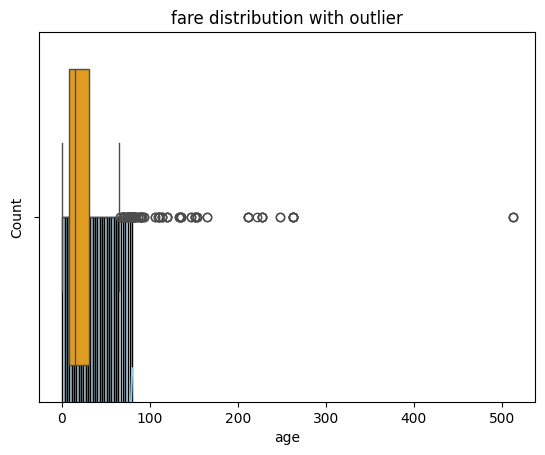

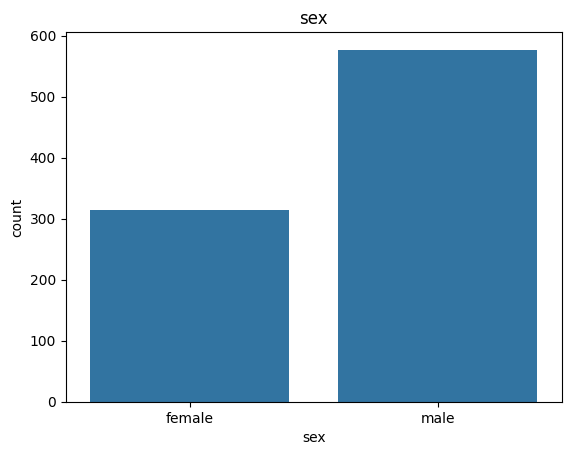

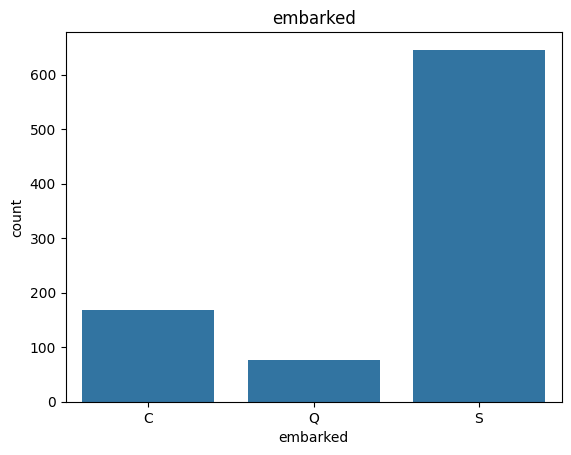

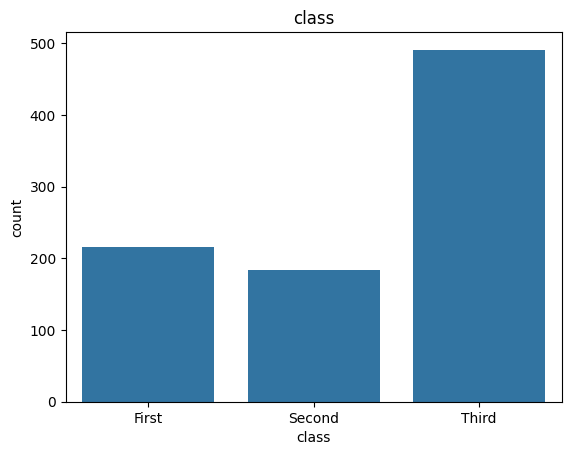

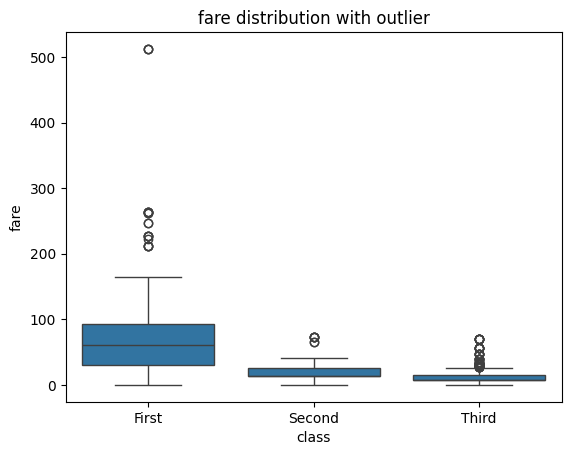

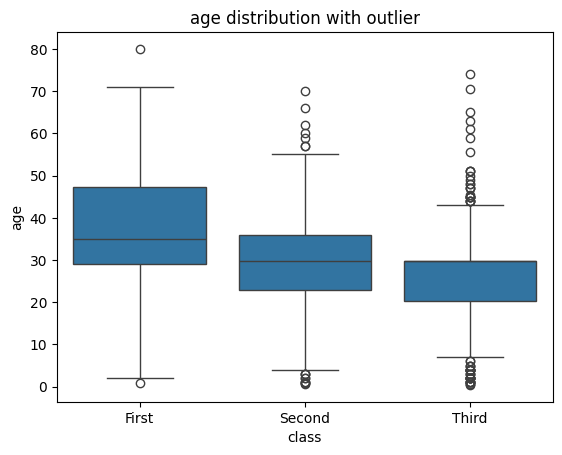

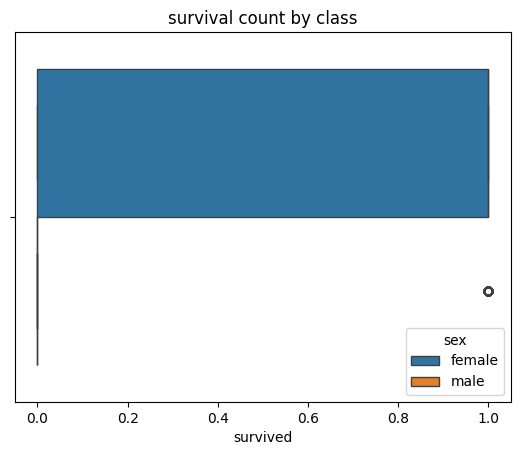

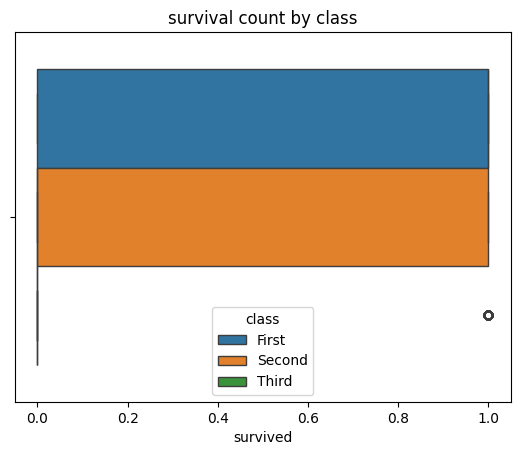

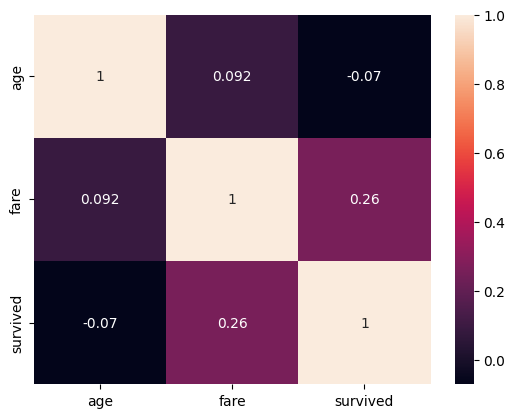

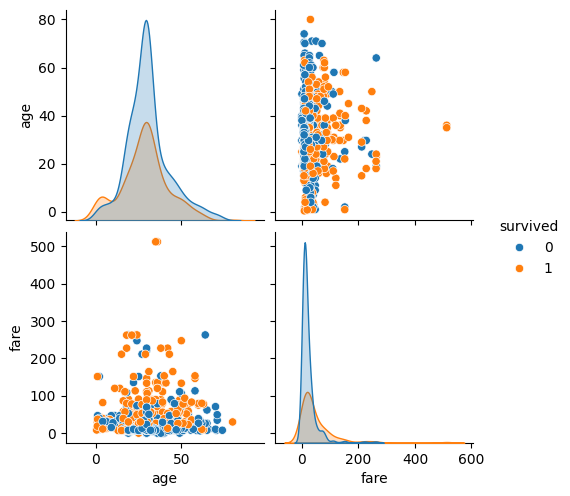

number of outliers in fare : 116


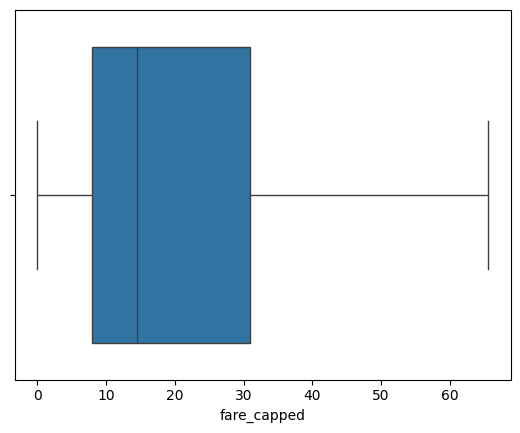

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')
print("shape of dataset",df.shape)
print("\n Data info\n")
df.info()
df.head()
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percentage':(df.isnull().sum()/df.shape[0])*100
})
missing.sort_values(by='missing_percentage',ascending=False)
df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'],inplace=True)
print("missing values for cleaning \n",df.isnull().sum().sum())
print("Duplicate rows:",df.duplicated().sum())
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()
num_cols=df.select_dtypes(include=np.number).columns
df[num_cols].describe()
sns.histplot(df['age'],bins=30,kde= True,color='skyblue')
sns.boxplot(x=df['fare'],color='orange')
plt.title("fare distribution with outlier")
plt.show()
cat_clos=df.select_dtypes('category').columns
for col in cat_clos:
  sns.countplot(x=df[col])
  plt.title(col)
  plt.show()
sns.boxplot(x='class',y='fare', data=df)
plt.title("fare distribution with outlier")
plt.show()
sns.boxplot(x='class',y='age', data=df)
plt.title("age distribution with outlier")
plt.show()
sns.boxplot(x='survived',hue='sex', data=df)
plt.title("survival count by class")
plt.show()
sns.boxplot(x='survived',hue='class', data=df)
plt.title("survival count by class")
plt.show()
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True)
plt.show()
sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()
Q1=df['fare'].quantile(0.25)
Q2=df['fare'].quantile(0.50)
Q3=df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print("number of outliers in fare :",len(outliers))
df['fare_capped']=df['fare'].clip(lower_bound,upper_bound)
sns.boxplot(x='fare_capped',data=df)
plt.show()

FIRST 10 rows:
   Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   
5      1     1  2010-03-12      21043.39        False        57.79   
6      1     1  2010-03-19      22136.64        False        54.58   
7      1     1  2010-03-26      26229.21        False        51.45   
8      1     1  2010-04-02      57258.43        False        62.27   
9      1     1  2010-04-09      42960.91        False        65.86   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN  

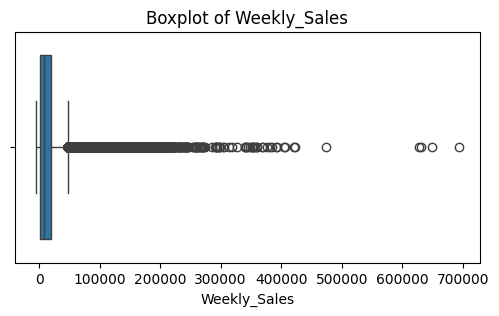

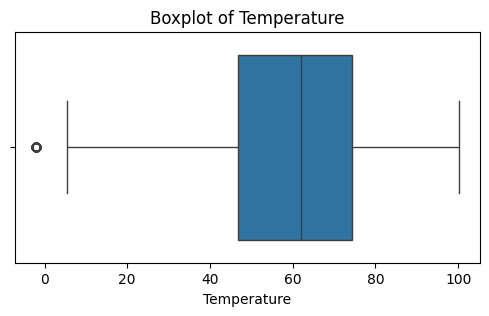

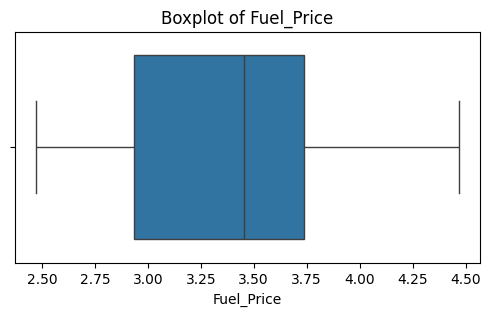

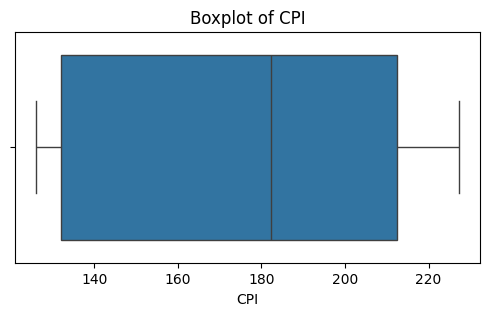

Weekly_Sales: Lower=-25109.653749999998, Upper=47395.15625
Temperature: Lower=5.279999999999994, Upper=115.68
Fuel_Price: Lower=1.7254999999999996, Upper=4.9455
CPI: Lower=11.431177550000001, Upper=333.00848195000003
Outliers in Weekly_Sales: 35521
Outliers in Temperature: 69
Outliers in Fuel_Price: 0
Outliers in CPI: 0
      Store  Dept       Date  Weekly_Sales
614       1     5 2010-11-26      70158.86
666       1     5 2011-11-25      79340.15
900       1     7 2010-11-26      72635.06
952       1     7 2011-11-25      71151.34
5119      1    38 2010-02-12      94136.35


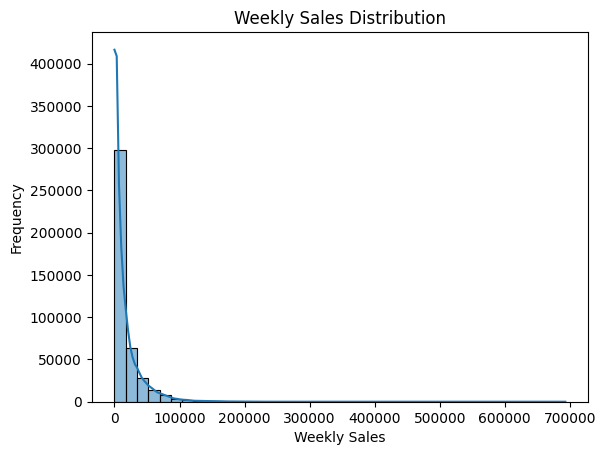

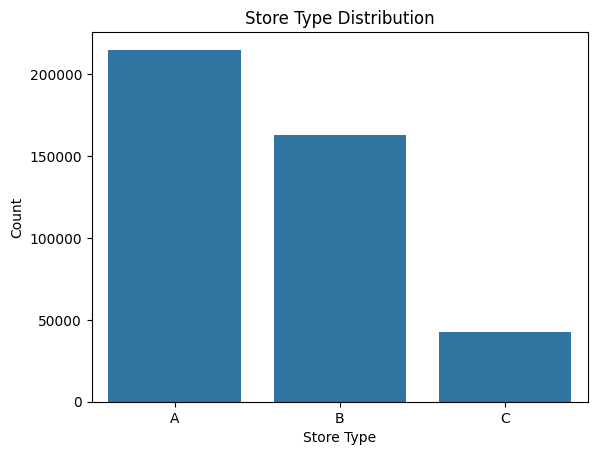

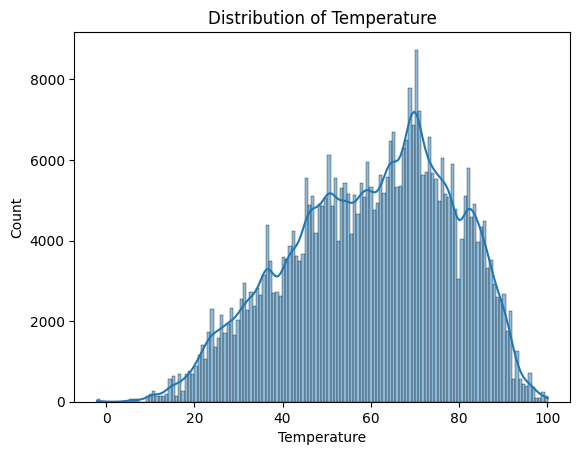

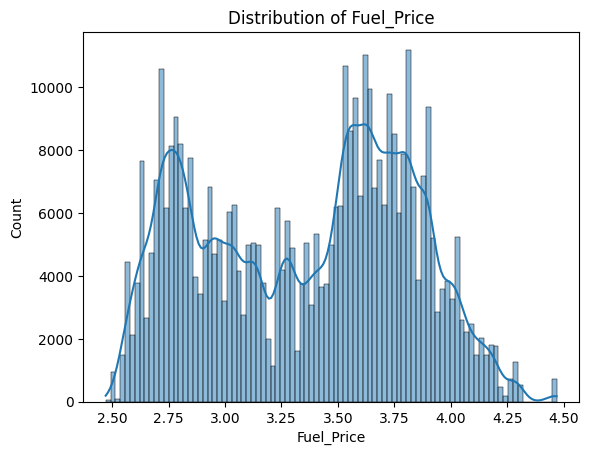

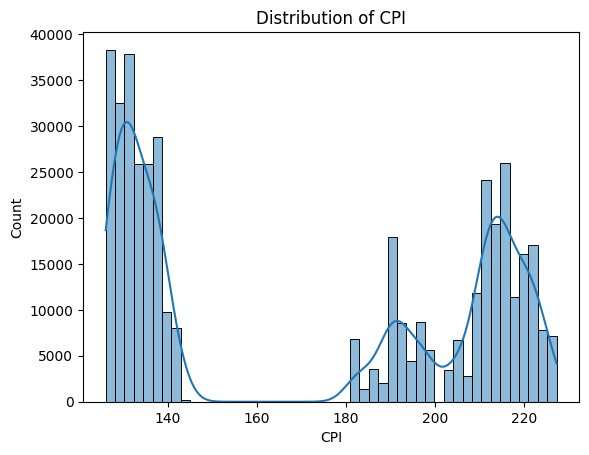

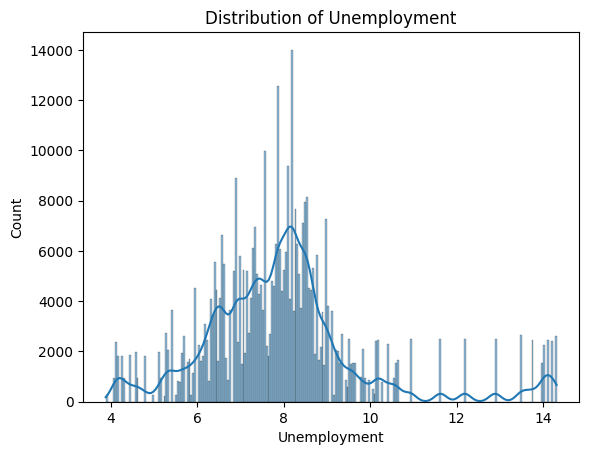

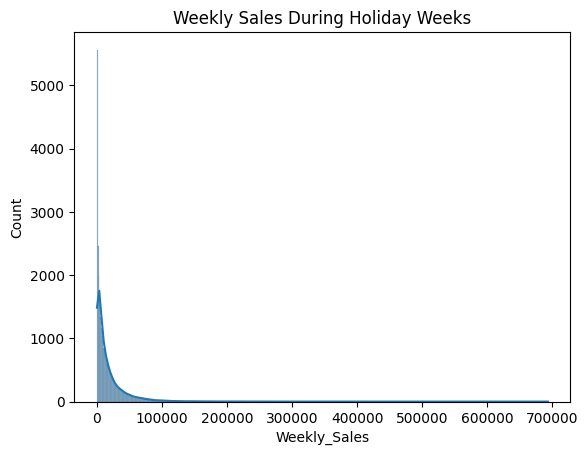

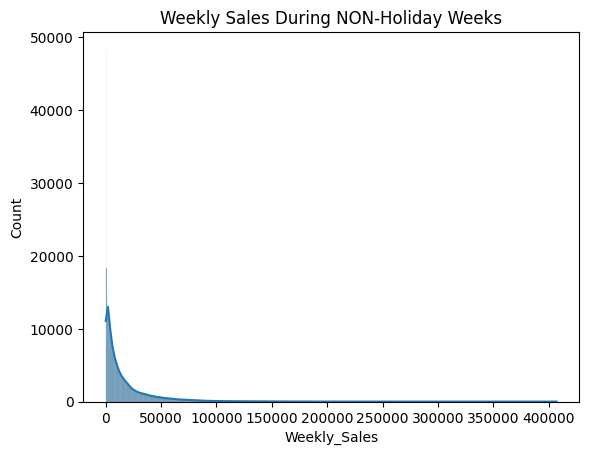

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50852.993977
65    45441.706224
90    45232.084488
40    44900.702727
2     43607.020113
94    33864.675127
91    33687.910758
Name: Weekly_Sales, dtype: float64


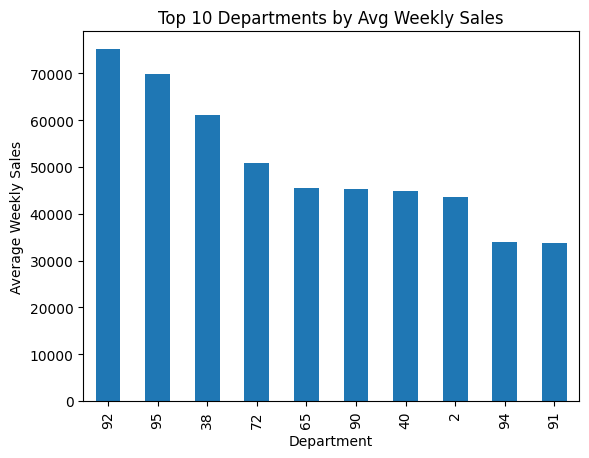

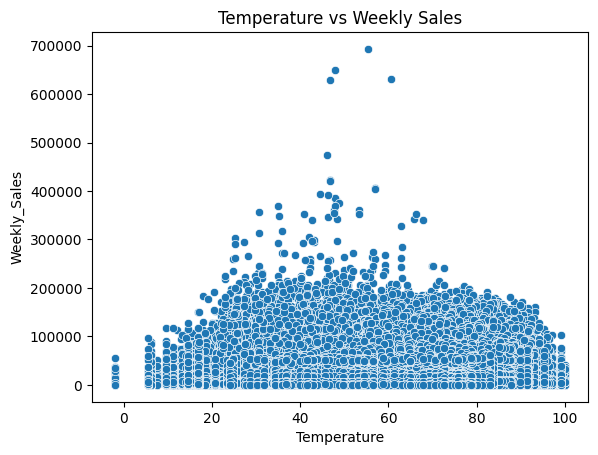

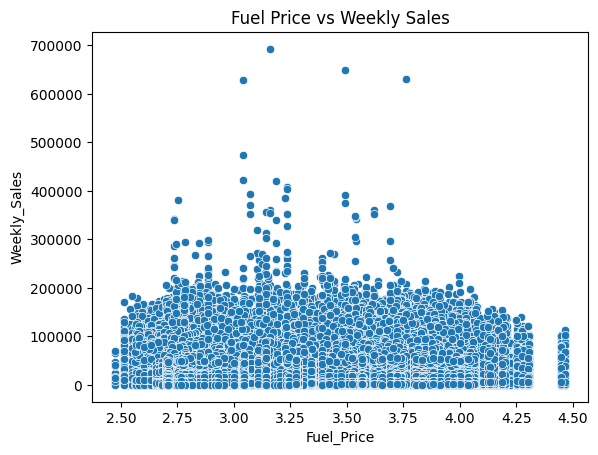

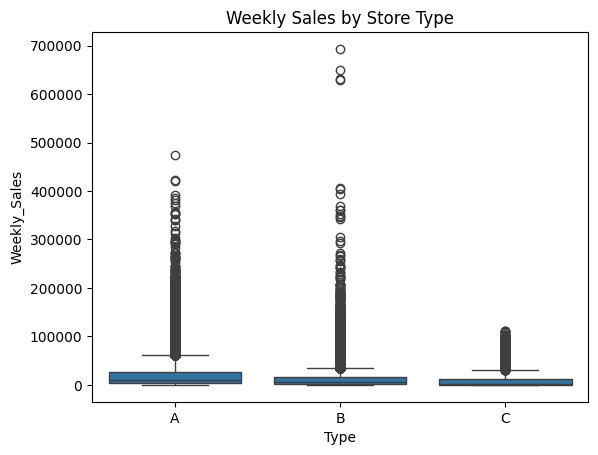

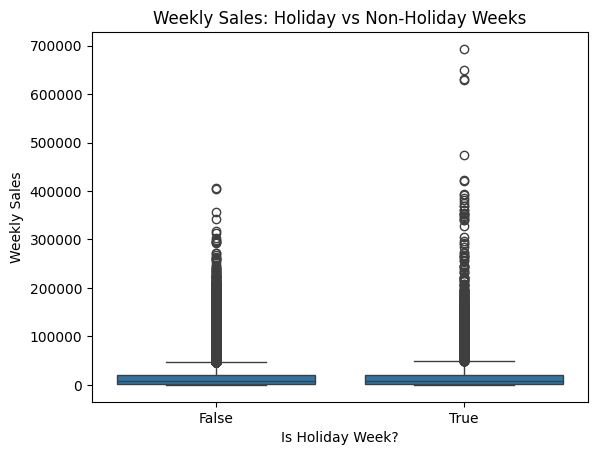

Lowest Performing Store: 5
Top Performing Store: 20


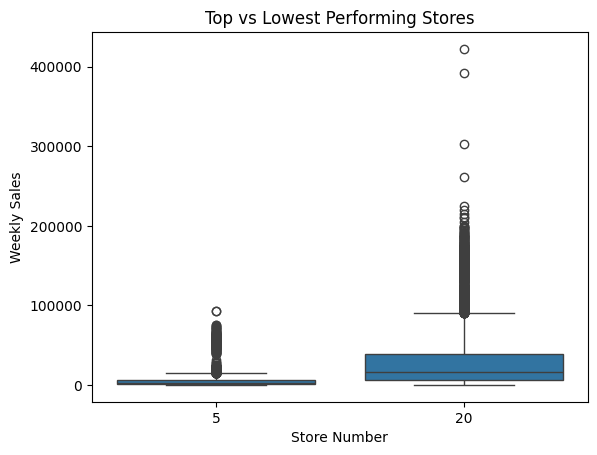

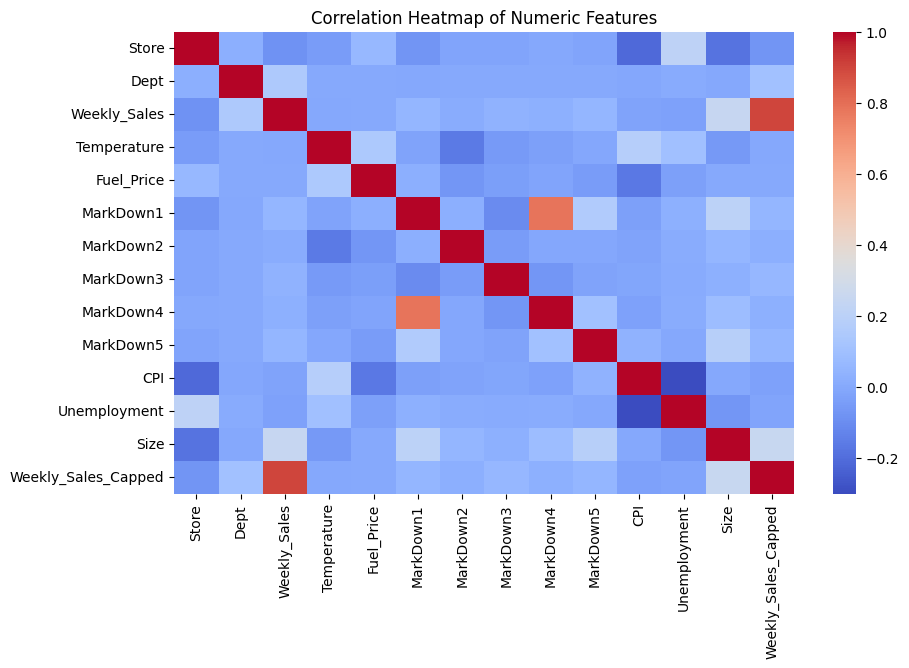

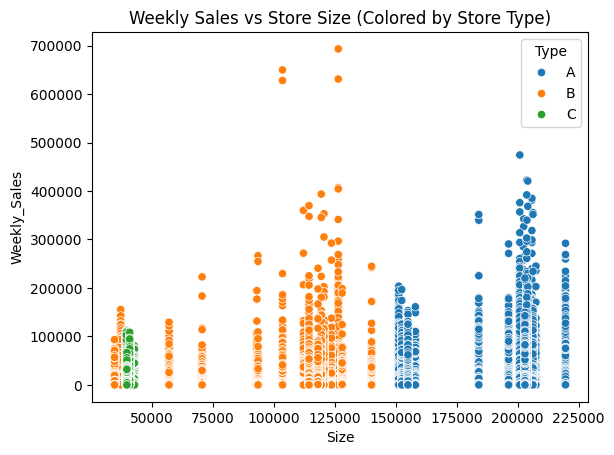

Type
A    20145.109276
B    12288.133746
C     9547.430645
Name: Weekly_Sales, dtype: float64


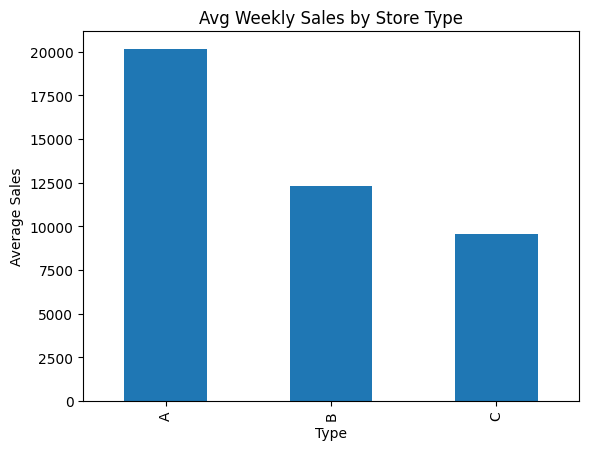

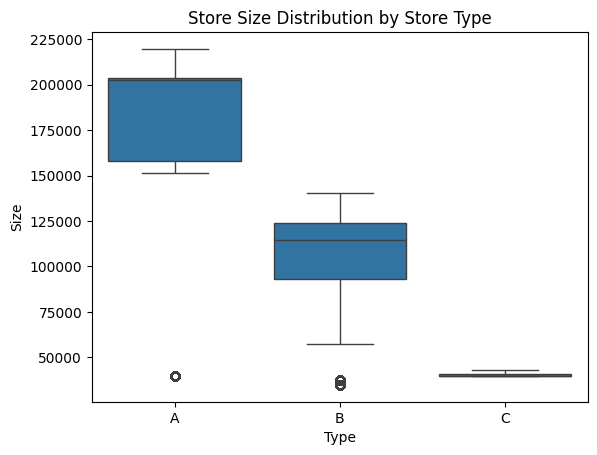

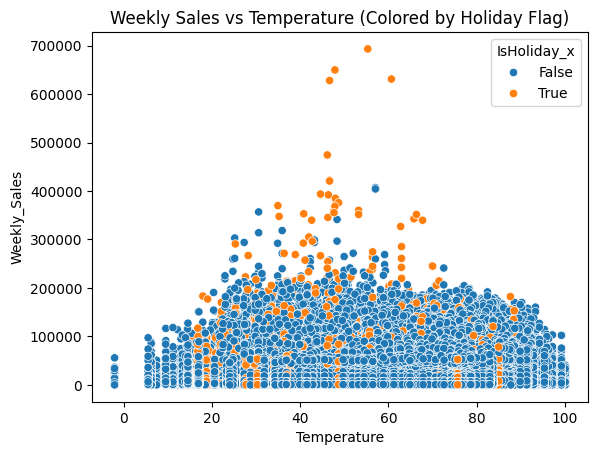

             Weekly_Sales  Temperature
IsHoliday_x                           
False        15949.958317    60.880976
True         17092.566220    49.642740
              Weekly_Sales  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
Weekly_Sales      1.000000   0.052251   0.013355   0.035979   0.026939   
MarkDown1         0.052251   1.000000   0.022829  -0.105705   0.785291   
MarkDown2         0.013355   0.022829   1.000000  -0.047706  -0.006413   
MarkDown3         0.035979  -0.105705  -0.047706   1.000000  -0.069656   
MarkDown4         0.026939   0.785291  -0.006413  -0.069656   1.000000   
MarkDown5         0.055529   0.160237  -0.007006  -0.024984   0.105507   

              MarkDown5  
Weekly_Sales   0.055529  
MarkDown1      0.160237  
MarkDown2     -0.007006  
MarkDown3     -0.024984  
MarkDown4      0.105507  
MarkDown5      1.000000  


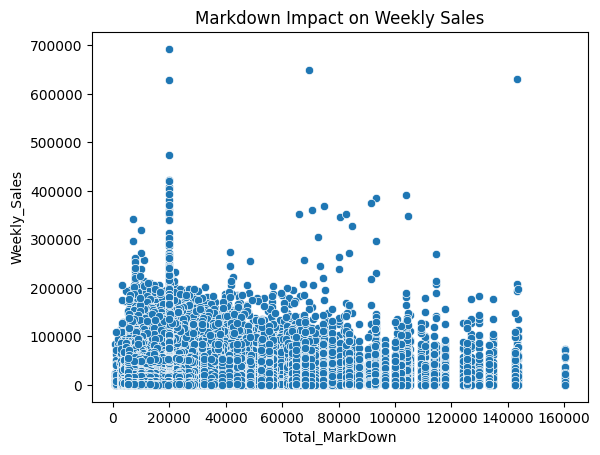

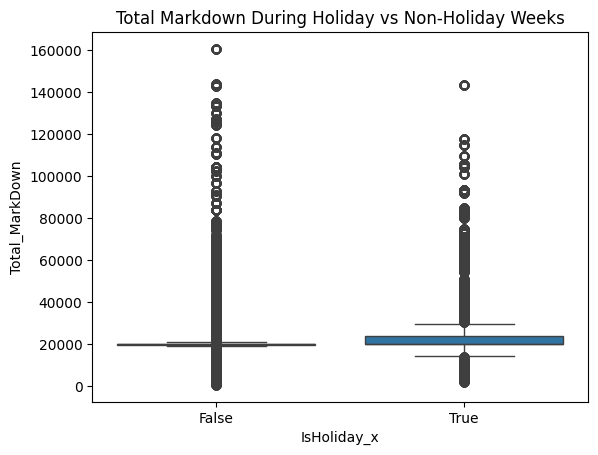

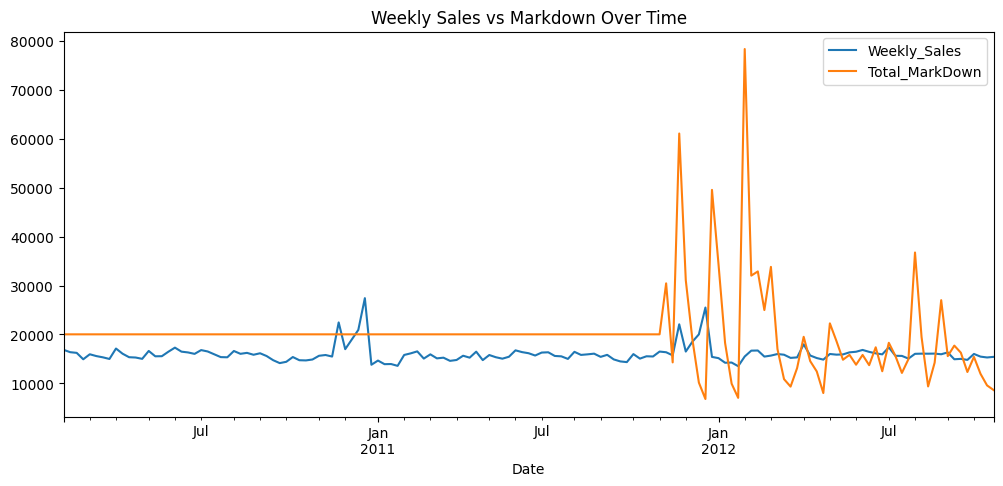

In [ ]:
import pandas as pd

# load files (if not already loaded)
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

# 1) Merge train + features on Store + Date, then merge stores
df = train.merge(features, on=["Store", "Date"], how="left")
df = df.merge(stores, on="Store", how="left")

# 2) Show first & last 10 rows
print("FIRST 10 rows:")
print(df.head(10))
print("\nLAST 10 rows:")
print(df.tail(10))

# 3) Shape, info, describe
print("\nSHAPE:", df.shape)
print("\nINFO:")
print(df.info())
print("\nDESCRIBE:")
print(df.describe(include='all'))

# 4) Identify column types
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
date_cols = [c for c in df.columns if c.lower().count('date')>0]  # finds 'Date'

print("\nNumerical columns:", num_cols)
print("Categorical / object columns:", cat_cols)
print("Date columns detected:", date_cols)

# 5) Unique store types and departments
print("\nUnique Store Types:", df['Type'].unique())
print("Unique Departments (sample & count):")
print(df['Dept'].unique()[:50])   # show up to 50 unique dept values
print("Number of unique departments:", df['Dept'].nunique())

# 6) Columns that may require cleaning or type conversion
print("\nMissing values pe r column:")
print(df.isnull().sum())

print("\nObject columns (may need cleaning / conversions):")
print(df.select_dtypes(include='object').columns.tolist())

# quick checks for common issues
print("\nColumns that look numeric but are object (first 5 values shown):")
for col in df.select_dtypes(include='object').columns:
    sample = df[col].astype(str).head(5).tolist()
    print(col, "->", sample)
# 1. Missing values
print("Missing values:\n")
print(df.isnull().sum())
# 2. Fill missing numeric columns with MEDIAN
num_fill_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

for col in num_fill_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
# 3. Fill missing MarkDown columns with MEAN
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3",
                 "MarkDown4", "MarkDown5"]

for col in markdown_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
# 4. Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# 5. Remove duplicate rows
df = df.drop_duplicates()
# 6. Reset index
df = df.reset_index(drop=True)
# Final check
print("\nAfter cleaning:\n")
print(df.info())
print("\nRemaining Missing Values:\n", df.isnull().sum())
import pandas as pd

# load files (if not already loaded)
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

# 1) Merge train + features on Store + Date, then merge stores
df = train.merge(features, on=["Store", "Date"], how="left")
df = df.merge(stores, on="Store", how="left")

# 2) Show first & last 10 rows
print("FIRST 10 rows:")
print(df.head(10))
print("\nLAST 10 rows:")
print(df.tail(10))

# 3) Shape, info, describe
print("\nSHAPE:", df.shape)
print("\nINFO:")
print(df.info())
print("\nDESCRIBE:")
print(df.describe(include='all'))

# 4) Identify column types
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
date_cols = [c for c in df.columns if c.lower().count('date')>0]  # finds 'Date'

print("\nNumerical columns:", num_cols)
print("Categorical / object columns:", cat_cols)
print("Date columns detected:", date_cols)

# 5) Unique store types and departments
print("\nUnique Store Types:", df['Type'].unique())
print("Unique Departments (sample & count):")
print(df['Dept'].unique()[:50])   # show up to 50 unique dept values
print("Number of unique departments:", df['Dept'].nunique())

# 6) Columns that may require cleaning or type conversion
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nObject columns (may need cleaning / conversions):")
print(df.select_dtypes(include='object').columns.tolist())

# quick checks for common issues
print("\nColumns that look numeric but are object (first 5 values shown):")
for col in df.select_dtypes(include='object').columns:
    sample = df[col].astype(str).head(5).tolist()
    print(col, "->", sample)
# 1. Missing values
print("Missing values:\n")
print(df.isnull().sum())
# 2. Fill missing numeric columns with MEDIAN
num_fill_cols = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

for col in num_fill_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
# 3. Fill missing MarkDown columns with MEAN
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3",
                 "MarkDown4", "MarkDown5"]

for col in markdown_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
# 4. Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# 5. Remove duplicate rows
df = df.drop_duplicates()
# 6. Reset index
df = df.reset_index(drop=True)
# Final check
print("\nAfter cleaning:\n")
print(df.info())
print("\nRemaining Missing Values:\n", df.isnull().sum())
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI"]

for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper
for col in cols:
    lower, upper = detect_outliers_iqr(df[col])
    print(f"{col}: Lower={lower}, Upper={upper}")
for col in cols:
    lower, upper = detect_outliers_iqr(df[col])
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in {col}: {len(outliers)}")
# Top 5% = extreme spikes
cutoff = df['Weekly_Sales'].quantile(0.95)

holiday_spikes = df[(df['Weekly_Sales'] > cutoff) & (df['IsHoliday_x'] == True)]
print(holiday_spikes[['Store','Dept','Date','Weekly_Sales']].head())
# These should be kept
keep_outliers = df[df['IsHoliday_x'] == True]
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['Weekly_Sales_Capped'] = df['Weekly_Sales']
df.loc[(df['IsHoliday_x'] == False) & (df['Weekly_Sales'] < lower), 'Weekly_Sales_Capped'] = lower
df.loc[(df['IsHoliday_x'] == False) & (df['Weekly_Sales'] > upper), 'Weekly_Sales_Capped'] = upper

df = df[df['Weekly_Sales'] >= 0]
sns.histplot(df['Weekly_Sales'], bins=40, kde=True)
plt.title("Weekly Sales Distribution")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

sns.countplot(x=df['Type'])
plt.title("Store Type Distribution")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.show()

cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

sns.histplot(df[df['IsHoliday_x'] == True]['Weekly_Sales'], kde=True)
plt.title("Weekly Sales During Holiday Weeks")
plt.show()

sns.histplot(df[df['IsHoliday_x'] == False]['Weekly_Sales'], kde=True)
plt.title("Weekly Sales During NON-Holiday Weeks")
plt.show()

top10_depts = df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
print(top10_depts)

top10_depts.plot(kind='bar')
plt.title("Top 10 Departments by Avg Weekly Sales")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.show()

sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'])
plt.title("Temperature vs Weekly Sales")
plt.show()

sns.scatterplot(x=df['Fuel_Price'], y=df['Weekly_Sales'])
plt.title("Fuel Price vs Weekly Sales")
plt.show()

sns.boxplot(x=df['Type'], y=df['Weekly_Sales'])
plt.title("Weekly Sales by Store Type")
plt.show()

sns.boxplot(x=df['IsHoliday_x'], y=df['Weekly_Sales'])
plt.title("Weekly Sales: Holiday vs Non-Holiday Weeks")
plt.xlabel("Is Holiday Week?")
plt.ylabel("Weekly Sales")
plt.show()

avg_sales_store = df.groupby('Store')['Weekly_Sales'].mean().sort_values()
low_store = avg_sales_store.index[0]
print("Lowest Performing Store:", low_store)
top_store = avg_sales_store.index[-1]
print("Top Performing Store:", top_store)

compare_df = df[df['Store'].isin([low_store, top_store])]

sns.boxplot(x=compare_df['Store'], y=compare_df['Weekly_Sales'])
plt.title("Top vs Lowest Performing Stores")
plt.xlabel("Store Number")
plt.ylabel("Weekly Sales")
plt.show()

numeric_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


sns.scatterplot(x=df['Size'], y=df['Weekly_Sales'], hue=df['Type'])
plt.title("Weekly Sales vs Store Size (Colored by Store Type)")
plt.show()

type_sales = df.groupby('Type')['Weekly_Sales'].mean()
print(type_sales)

type_sales.plot(kind='bar')
plt.title("Avg Weekly Sales by Store Type")
plt.ylabel("Average Sales")
plt.show()

sns.boxplot(x=df['Type'], y=df['Size'])
plt.title("Store Size Distribution by Store Type")
plt.show()

sns.scatterplot(
    x=df['Temperature'],
    y=df['Weekly_Sales'],
    hue=df['IsHoliday_x']
)
plt.title("Weekly Sales vs Temperature (Colored by Holiday Flag)")
plt.show()

summary = df.groupby(['IsHoliday_x'])[['Weekly_Sales','Temperature']].mean()
print(summary)

markdown_cols = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]

print(df[["Weekly_Sales"] + markdown_cols].corr())

df['Total_MarkDown'] = df[markdown_cols].sum(axis=1)

sns.scatterplot(x=df['Total_MarkDown'], y=df['Weekly_Sales'])
plt.title("Markdown Impact on Weekly Sales")
plt.show()

sns.boxplot(x=df['IsHoliday_x'], y=df['Total_MarkDown'])
plt.title("Total Markdown During Holiday vs Non-Holiday Weeks")
plt.show()

df['Date'] = pd.to_datetime(df['Date'])

weekly_md = df.groupby('Date')[["Weekly_Sales","Total_MarkDown"]].mean()

weekly_md.plot(figsize=(12,5))
plt.title("Weekly Sales vs Markdown Over Time")
plt.show()

